In [26]:
import Functions as func
import SimModel
import matplotlib.pyplot as plt
import Agent
import pylab as pltstack
import numpy as np

In [27]:
datafcr, dataafrr, datamfrr, datalastprofile, pvdata, pricedata = func.getdata('11-09','11-26')

agent = Agent.agentoccupancyrate(100)
#agent = Agent.agentnopv()
#agent = Agent.agentmanualinput()

model = SimModel.Model(datalastprofile, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dataafrr, datafcr, pvdata, 6, 5, 100, agent)


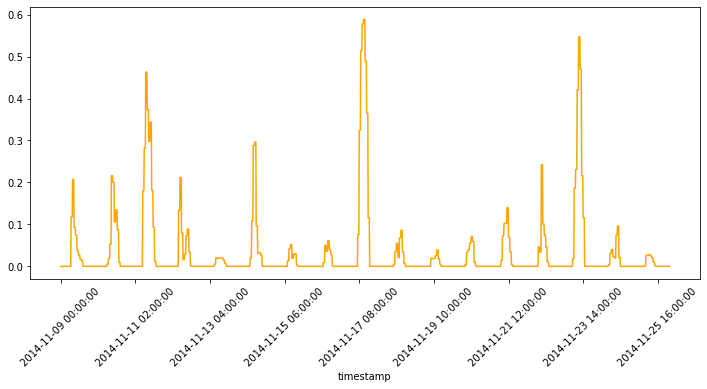

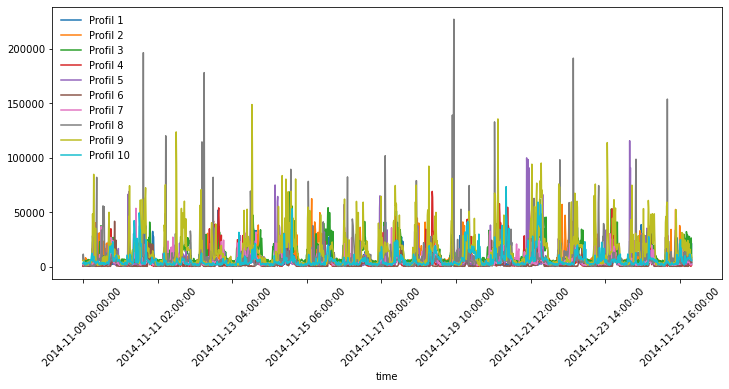

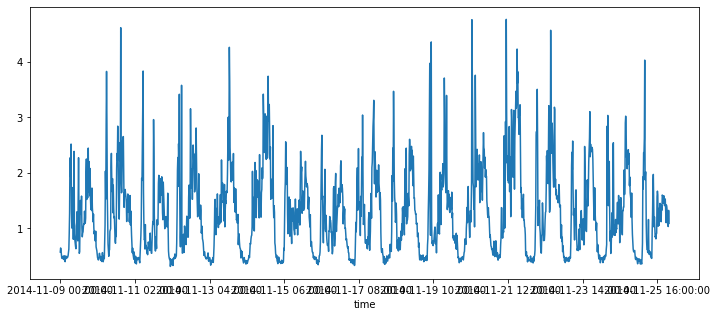

In [28]:
func.plotpvdata(pvdata)
func.plotlastprofiledata(datalastprofile, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.figure(figsize=(12, 5))
datalastprofile['Summe'].plot()

In [29]:
model.run()
model.cutlogdatei()

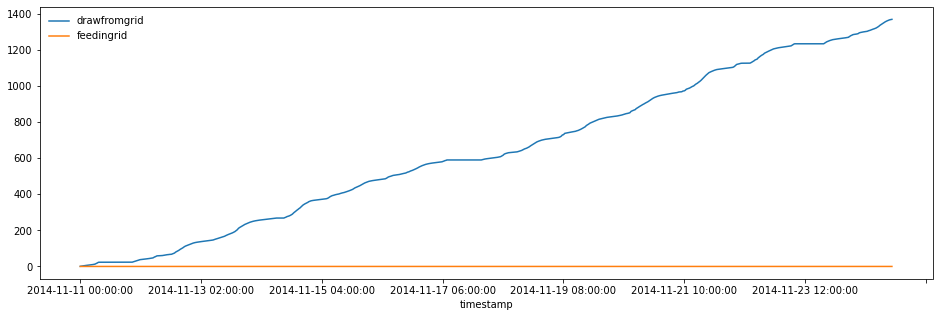

In [30]:
plt.figure(figsize=(16, 5))
cumsumdatadraw = model.logdata['drawfromgrid'].cumsum()
cumsumdatafeed = model.logdata['feedingrid'].cumsum()
cumsumdatadraw.plot()
cumsumdatafeed.plot()
plt.legend(loc='upper left', frameon=False)

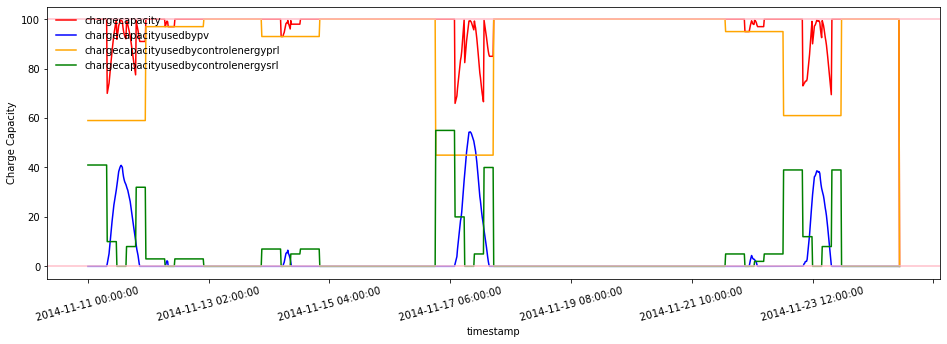

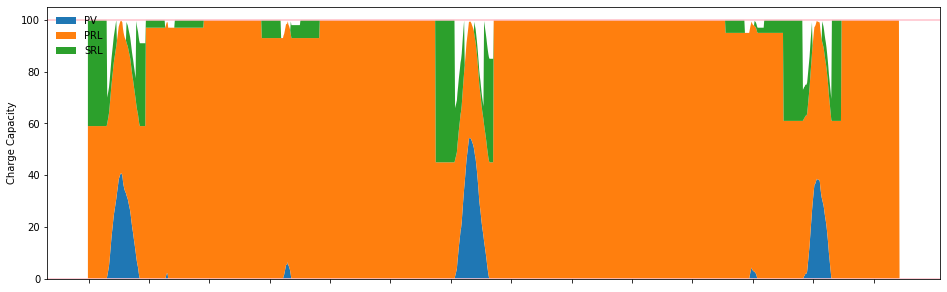

In [31]:
func.plotchargecapacity(model)

In [32]:
model.logdata.to_csv('test.csv')

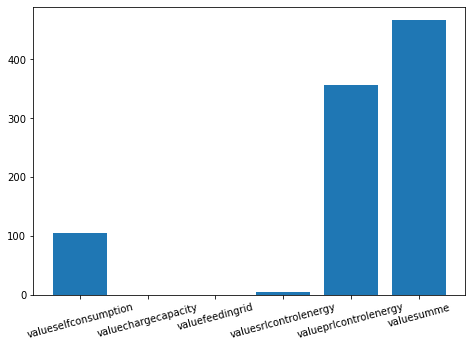

465.9402799999999

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['valueselfconsumption', 'valuechargecapacity', 'valuefeedingrid', 'valuesrlcontrolenergy', 'valueprlcontrolenergy', 'valuesumme']
data = model.evaluaterevenuestream()
ax.bar(langs,data)
plt.xticks(rotation=15)
plt.show()
data[5]